In [18]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import torchvision
import numpy as np
from tqdm import tqdm

In [2]:
dataset_folder = "/home/jordan/Documents/datasets/ball_pythons/"

In [3]:
main_folder_list = os.listdir(dataset_folder)
morph_folder_list = [f"{dataset_folder}{i}/" for i in main_folder_list if "%" not in i and "." not in i and "Pos" not in i]

In [4]:
morph_img_folder_dict = {}
for morph_folder in morph_folder_list:
    morph_img_folder_list = os.listdir(morph_folder)
    morph_img_folder_list = [f"{morph_folder}{i}/" for i in morph_img_folder_list]
    if len(morph_img_folder_list) > 15:
        morph_img_folder_dict[morph_folder.split("/")[-2]] = {"img_folders": morph_img_folder_list,
        "num_imgs": len(morph_img_folder_list)}

/tmp/ipykernel_230362/640839315.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


total imgs in dict: 11735 - 29 morphs


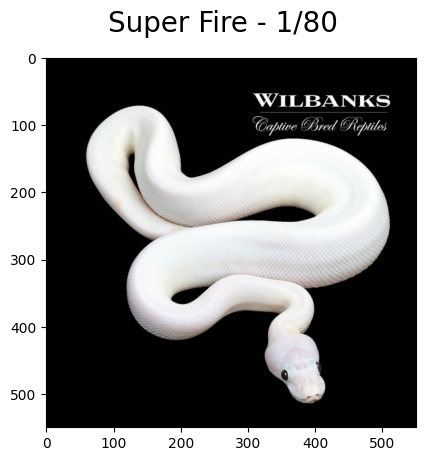

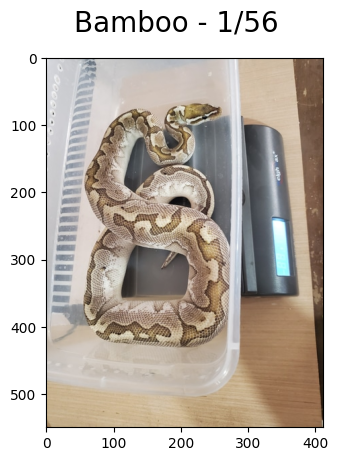

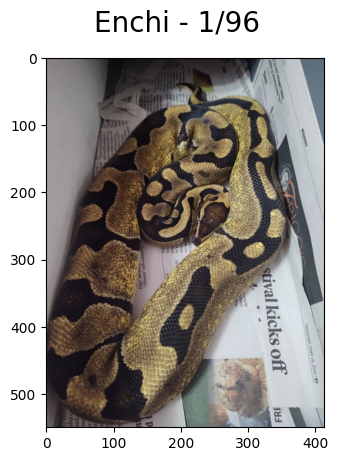

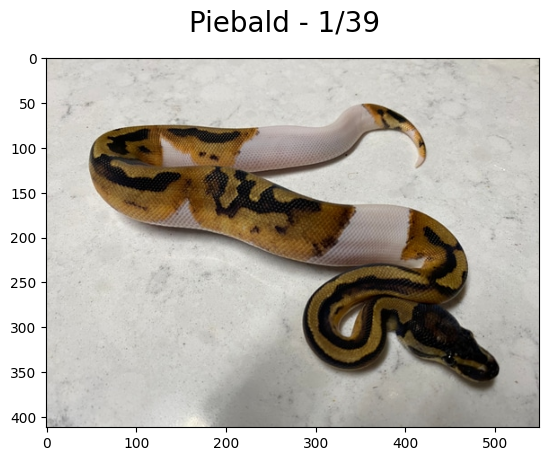

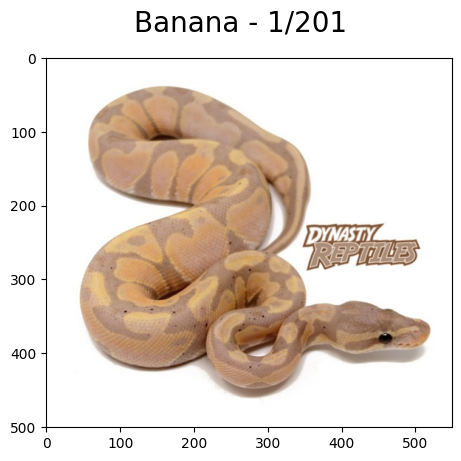

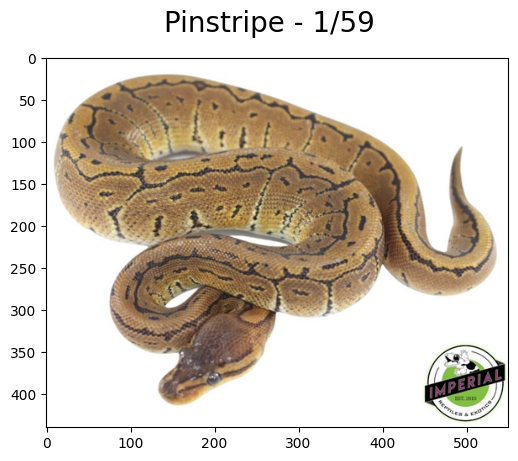

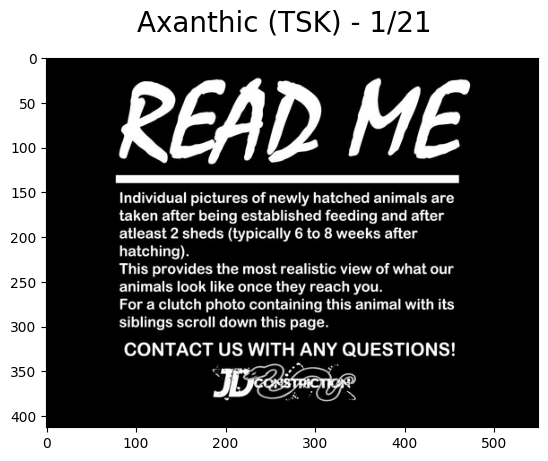

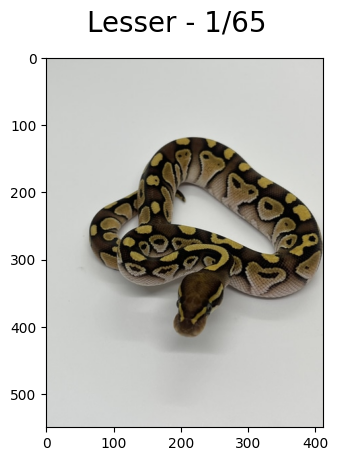

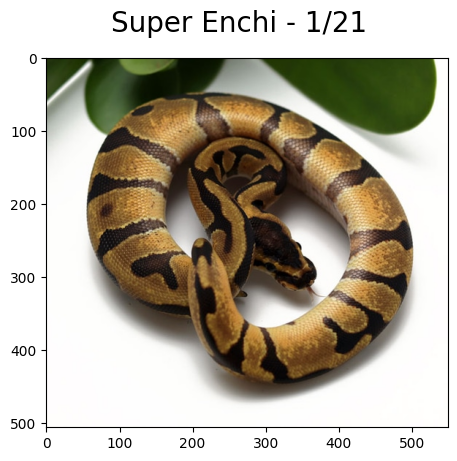

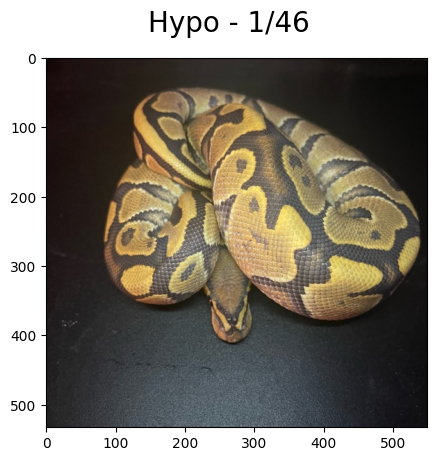

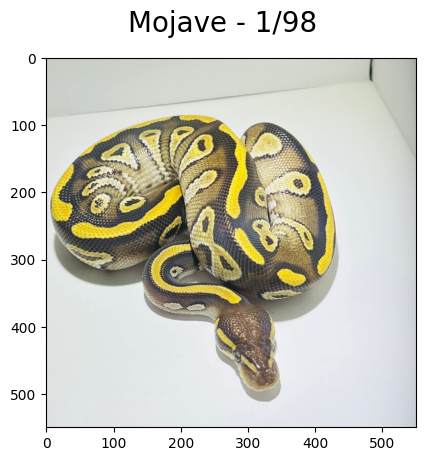

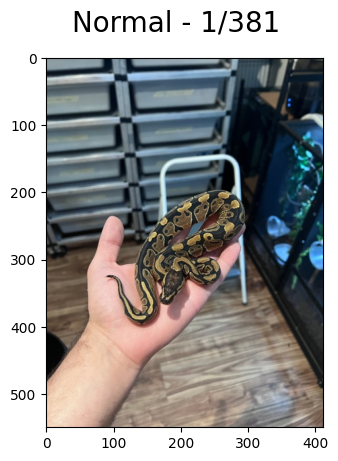

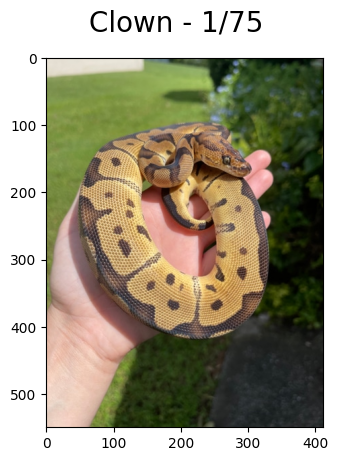

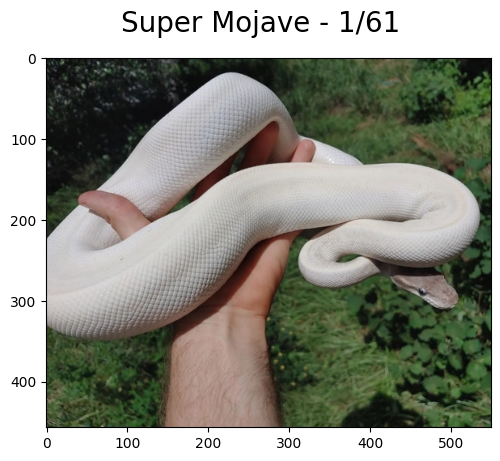

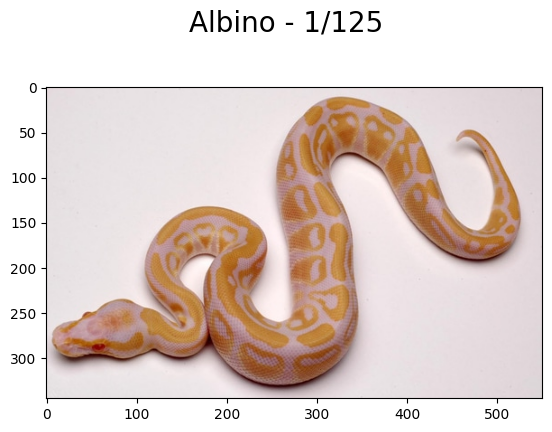

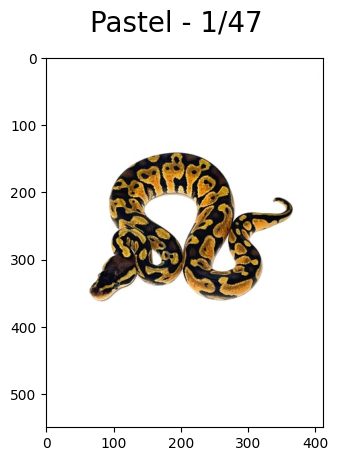

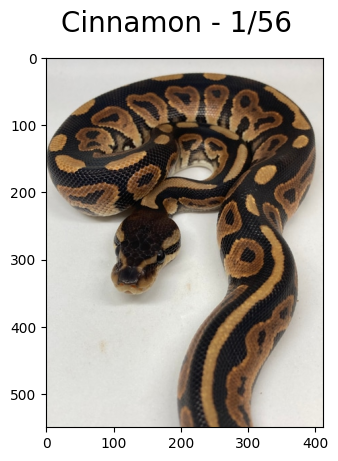

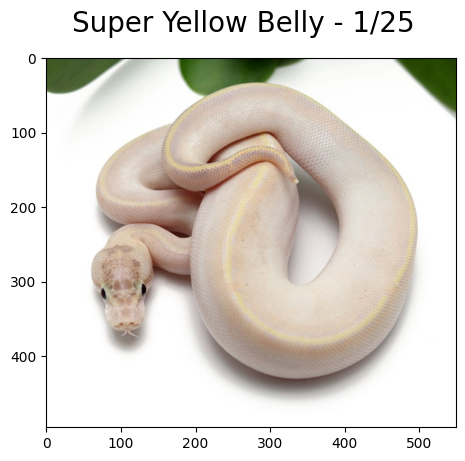

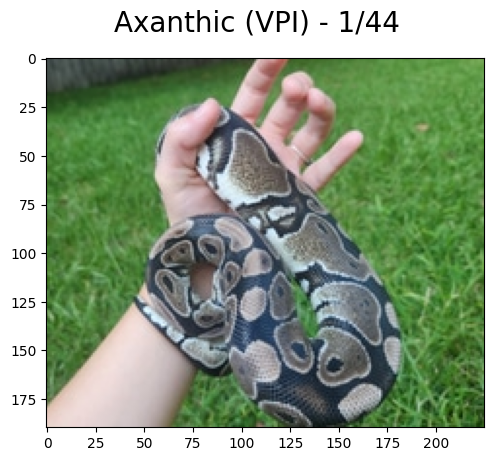

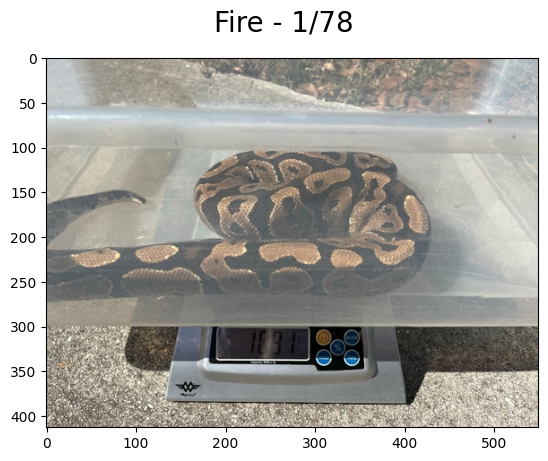

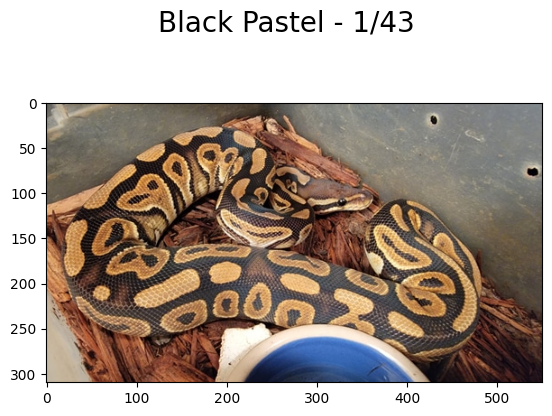

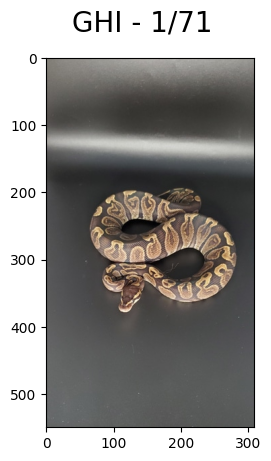

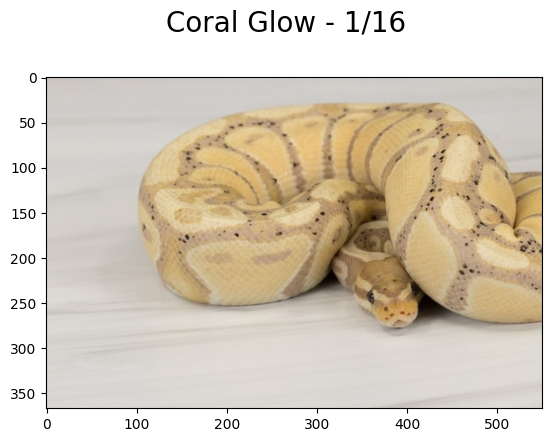

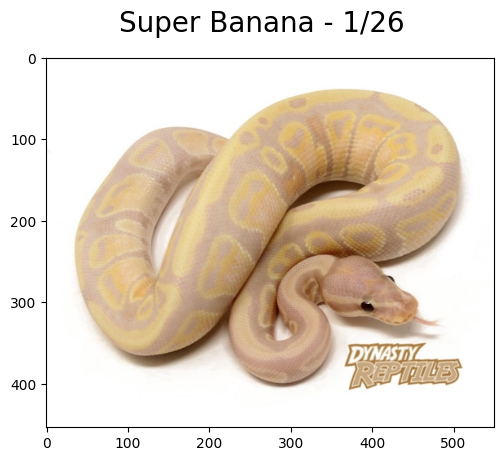

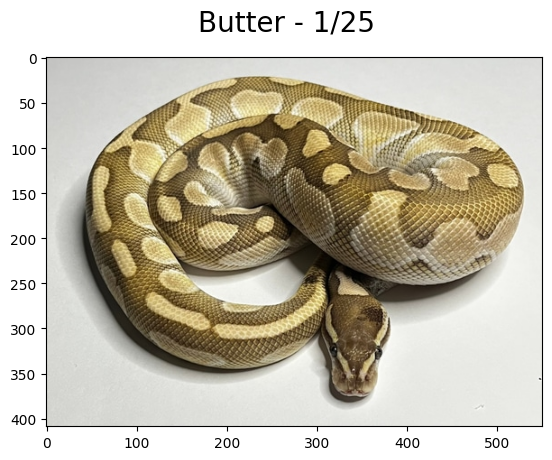

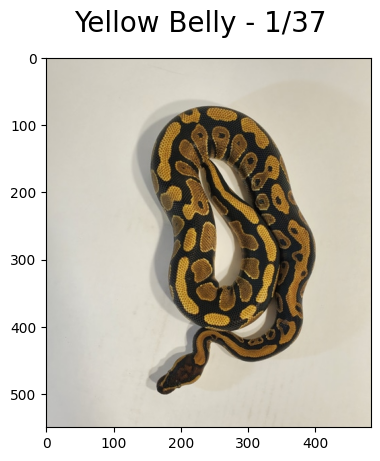

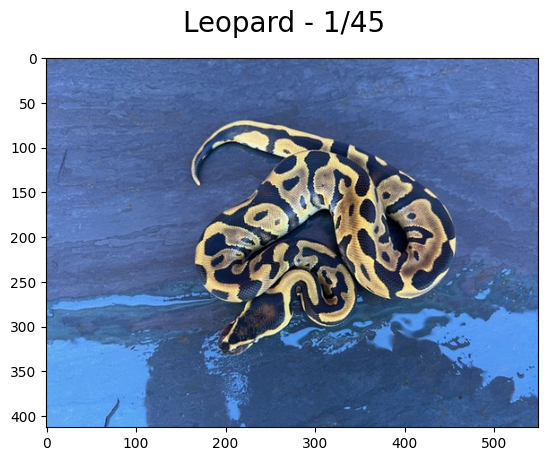

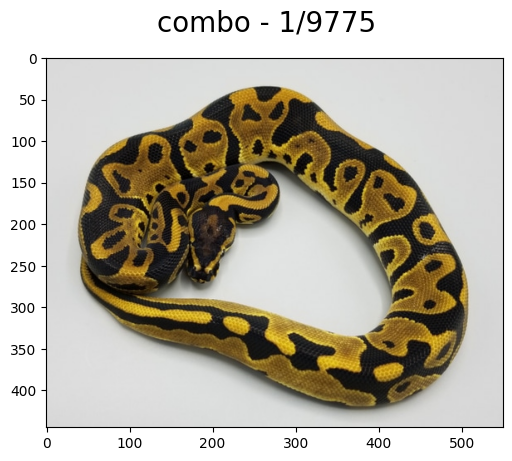

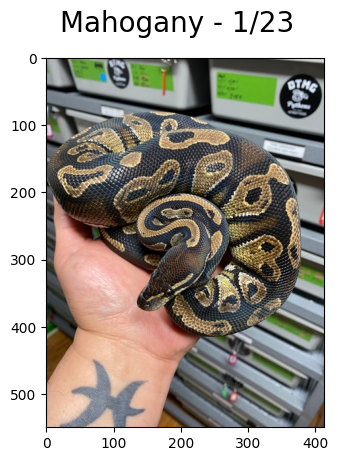

In [14]:
%matplotlib inline
total = 0
json_paths_list = []
for morph, morph_dict in morph_img_folder_dict.items():
    img_folder_list = morph_dict["img_folders"]
    image_paths = [[i+k for k in os.listdir(i) if k.endswith(".png")][0] for i in img_folder_list]
    json_paths = [[i+k for k in os.listdir(i) if k.endswith(".json")][0] for i in img_folder_list]
    json_paths_list.extend(json_paths)
    fig = plt.figure()
    image = Image.open(image_paths[9])
    plt.imshow(image)
    plt.suptitle(f"{morph} - 1/{morph_dict['num_imgs']}", fontsize=20)
    total += morph_dict["num_imgs"]
print(f"total imgs in dict: {total} - {len(morph_img_folder_dict)} morphs")

In [27]:
morph_details_dict = {}
all_image_details_dict = {}
for path in tqdm(json_paths_list):
    cur_morph = path.split("/")[-3]
    if not morph_details_dict.get(cur_morph):
        morph_details_dict[cur_morph] = {}
    with open(path, "r") as f:
        image_details_dict = json.load(f)
        del image_details_dict["raw_details"]
    image_name = path
    morph_details_dict[cur_morph][image_name] = image_details_dict
    all_image_details_dict[image_name] = image_details_dict

100%|██████████| 11735/11735 [00:00<00:00, 32914.73it/s]


In [28]:
metadata_df = pd.DataFrame.from_dict(all_image_details_dict, orient="index")

In [29]:
metadata_df.head()

sex        traits  \
/home/jordan/Documents/datasets/ball_pythons/Su...    male  [Super Fire]   
/home/jordan/Documents/datasets/ball_pythons/Su...  female  [Super Fire]   
/home/jordan/Documents/datasets/ball_pythons/Su...  female  [Super Fire]   
/home/jordan/Documents/datasets/ball_pythons/Su...  female  [Super Fire]   
/home/jordan/Documents/datasets/ball_pythons/Su...  female  [Super Fire]   

                                                      dob      price weight  \
/home/jordan/Documents/datasets/ball_pythons/Su...  2022   US$275.00    NaN   
/home/jordan/Documents/datasets/ball_pythons/Su...  2022   US$400.00   129g   
/home/jordan/Documents/datasets/ball_pythons/Su...  2022   US$350.00    88g   
/home/jordan/Documents/datasets/ball_pythons/Su...  2022   US$350.00    94g   
/home/jordan/Documents/datasets/ball_pythons/Su...  2022   US$350.00    99g   

                                                   proven_breeder  
/home/jordan/Documents/datasets/ball_pythons/Su...            NaN  
/home/jordan/Documents/datasets/ball_pythons/Su...            NaN  
/home/jordan/Documents/datasets/ball_pythons/Su...            NaN  
/home/jordan/Documents/datasets/ball_pythons/Su...            NaN  
/home/jordan/Documents/datasets/ball_pythons/Su...            NaN

In [10]:
def square_crop(tensor):
        longer_side = min(tensor.size)
        horizontal_padding = (longer_side - tensor.size[0]) / 2
        vertical_padding = (longer_side - tensor.size[1]) / 2
        cropped_tensor = tensor.crop((-horizontal_padding,
                    -vertical_padding,
                    tensor.size[0] + horizontal_padding,
                    tensor.size[1] + vertical_padding
                ))
        return cropped_tensor

In [11]:
def get_split(array_to_split, split):
    np.random.seed(0)
    np.random.shuffle(array_to_split)
    np.random.seed()
    if split == 'train':
        array_to_split = array_to_split[:int(len(array_to_split)*0.7)]
    elif split == 'val':
        array_to_split = array_to_split[int(len(array_to_split)*0.7):int(len(array_to_split)*0.85)]
    elif split == 'test':
        array_to_split = array_to_split[int(len(array_to_split)*0.85):]
    return array_to_split